Treinando uma rede neural
=========================



## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### Classes



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida
    
    def parametros(self):
        return self.pesos + [self.vies]


class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
        
    def parametros(self):
        
        params = []
        
        for neoronio in self.neuronios:
            params.extend(neoronio.parametros())
            
        return params


class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            params.extend(camada.parametros())
            
        return params

### A função de perda (*loss function*)



Fomos ao laboratório e sintetizamos 4 amostras de [<i>suquinho da felicidade</i>]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [<i>arco-íris</i>] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



In [3]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [4]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



In [5]:
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.318223781564869), Valor(data=0.32265085237887725), Valor(data=0.31847931484557035), Valor(data=0.31796424414596397)]


Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [6]:
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.6160967490201494)


A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



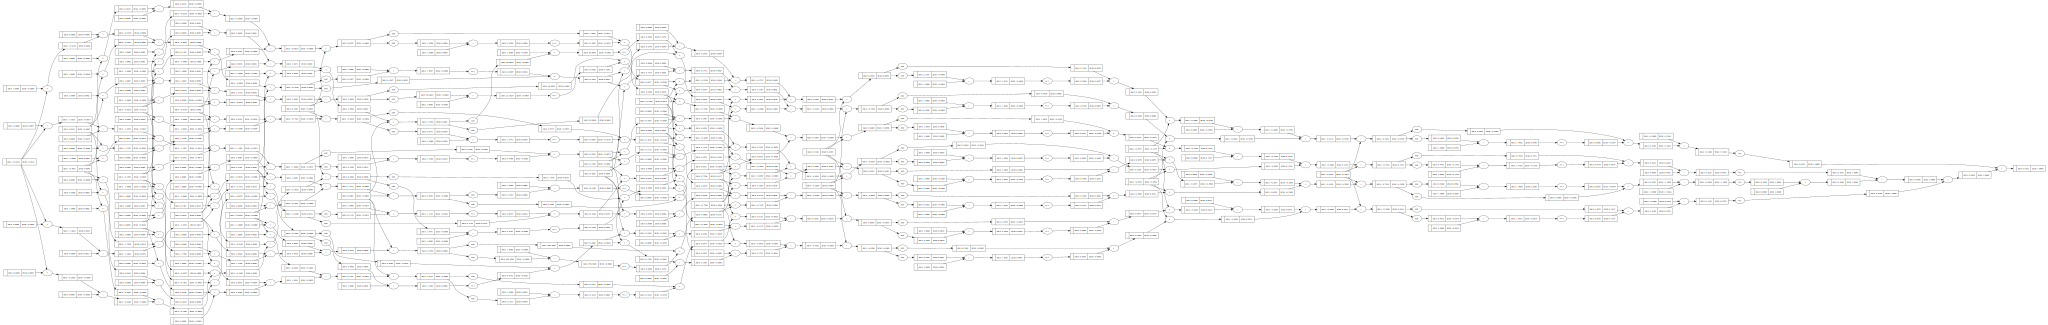

In [7]:
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

<h3> mó grafão 😲</h3>

### Treinando a rede através da atualização dos parâmetros



Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



In [8]:
parametros = minha_mlp.parametros()

print(len(parametros))
print()
parametros

23



[Valor(data=-0.5310426794182561),
 Valor(data=-0.4650616319450551),
 Valor(data=-0.14014825240070028),
 Valor(data=0.14811585673950978),
 Valor(data=0.5619033512768941),
 Valor(data=-0.6278704559967137),
 Valor(data=-0.014608820125436628),
 Valor(data=0.7220381602941099),
 Valor(data=0.8695042241463893),
 Valor(data=0.9676407925661341),
 Valor(data=-0.6593399286470976),
 Valor(data=0.8981391599084803),
 Valor(data=0.7319533818199664),
 Valor(data=-0.77495098884075),
 Valor(data=0.7300066316988281),
 Valor(data=0.41247452444991106),
 Valor(data=0.4280567276246037),
 Valor(data=0.056508663555753236),
 Valor(data=-0.7201639195294538),
 Valor(data=-0.20831141228958194),
 Valor(data=-0.29706840042159244),
 Valor(data=-0.010373514002276929),
 Valor(data=-0.5517928319201311)]

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



In [9]:
TAXA_DE_APRENDIZADO = 0.1

for p in minha_mlp.parametros():
    p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!



In [10]:
y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.6107269206882827)


### A descida do gradiente



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



In [11]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [12]:
NUM_EPOCAS = 10
TAXA_DE_APRENDIZADO = 2

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for x_ in x:
        previsao = minha_mlp(x_)
        y_pred.append(previsao)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0
    
    # loss
    loss = []
    for yp, yt in zip(y_pred, y_true):
        loss.append((yp - yt)**2)
    loss = sum(loss)        

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    print(epoca, loss.data)

0 0.9532337145080693
1 0.5770804358114806
2 0.5688613375414734
3 0.5666539531871069
4 0.5644642878213281
5 0.5619729444563852
6 0.559011673928376
7 0.5553746692229942
8 0.5508050800756418
9 0.5449859570350994


Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [13]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.4346953665222004), Valor(data=0.4128601139941636), Valor(data=0.4239187878722076), Valor(data=0.4305483541289507)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



## Conclusão

<p style="text-align: justify">Descida do gradiente é um método utilizado no treinamento de redes neurais para atualizar os parâmetros da rede com o objetivo de minimizar a função de perda. A ideia básica é ajustar os parâmetros na direção oposta ao gradiente da função de perda em relação a esses parâmetros, pois essa direção indica o maior crescimento da função. </p>

<p style="text-align: justify">No código, o treinamento da rede neural ocorre por meio da descida do gradiente. O processo de treinamento é realizado em um loop por um número definido de épocas. Em cada época, são realizadas as seis etapas: </p>

1. Forward pass: é feita uma passagem para frente pela rede neural, onde os dados de entrada são propagados através das camadas da rede para gerar uma previsão;

2. Zerar os gradientes: antes de realizar o backpropagation, os gradientes dos parâmetros da rede são zerados para garantir que os gradientes antigos não sejam mais válidos.

3. Cálculo da função de perda: calcula-se a função de perda, que mede a diferença entre as previsões da rede (y_pred) e os valores verdadeiros (y_true).

4. Backpropagation: é realizado o backpropagation para propagar os gradientes da função de perda até os parâmetros da rede, calculando o gradiente de cada parâmetro em relação à função de perda.

5. Atualização dos parâmetros: os parâmetros da rede são atualizados usando a fórmula de descida do gradiente, multiplicando o gradiente de cada parâmetro pelo valor da taxa de aprendizado (TAXA_DE_APRENDIZADO) e subtraindo esse valor do parâmetro atual.

6. Mostra resultado: exibe o valor da função de perda após cada época.

<p style="text-align: justify">Esse processo é repetido por um número pré-definido de épocas para permitir que a rede neural aprenda a mapear corretamente os dados de entrada para os valores de saída desejados. No final do treinamento, a rede é capaz de fazer previsões mais precisas.</p>